In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import simps
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import random
random.seed(1200)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DDP/stressstrain.csv')
shape = df.shape
df_remove = pd.read_csv('/content/drive/MyDrive/DDP/Remove.csv')

In [4]:
strains = df.Strain
stresses = df.Stress

strains_remove = df_remove.Strain
stresses_remove = df_remove.Stress

In [5]:
energy = []
energy_remove = []
for i in range(df.shape[0]):
  energy_calc = simps(stresses[0:i+1],x=strains[0:i+1])
  energy.append(energy_calc)

for i in range(df_remove.shape[0]):
  energy_calc = simps(stresses_remove[0:i+1],x=strains_remove[0:i+1])
  energy_remove.append(energy_calc)

df["Energy"] = energy
df_remove["Energy"] = energy_remove

In [6]:
print(df)

     Stretch  Strain  Stress    Energy
0       1.05    0.05   0.274  0.000000
1       1.10    0.10   0.492  0.019150
2       1.15    0.15   0.670  0.048533
3       1.20    0.20   0.794  0.085192
4       1.25    0.25   0.881  0.127317
..       ...     ...     ...       ...
105     6.30    5.30   3.100  5.973817
106     6.35    5.35   3.173  6.130550
107     6.40    5.40   3.304  6.292363
108     6.45    5.45   3.469  6.461517
109     6.50    5.50   3.572  6.637829

[110 rows x 4 columns]


In [7]:
print(df_remove)

    Stretch  Strain  Stress    Energy
0      5.20    4.20   0.127  0.000000
1      5.25    4.25   0.161  0.007200
2      5.30    4.30   0.190  0.016017
3      5.35    4.35   0.219  0.026221
4      5.40    4.40   0.251  0.037967
5      5.45    4.45   0.284  0.051329
6      5.50    4.50   0.320  0.066417
7      5.55    4.55   0.362  0.083442
8      5.60    4.60   0.403  0.102600
9      5.65    4.65   0.456  0.123996
10     5.70    4.70   0.510  0.148217
11     5.75    4.75   0.564  0.174992
12     5.80    4.80   0.620  0.204650
13     5.85    4.85   0.676  0.236983
14     5.90    4.90   0.751  0.272567
15     5.95    4.95   0.833  0.312150
16     6.00    5.00   0.929  0.356100
17     6.05    5.05   1.038  0.405262
18     6.10    5.10   1.133  0.459667
19     6.15    5.15   1.303  0.520183
20     6.20    5.20   1.566  0.591517
21     6.25    5.25   1.726  0.674250
22     6.30    5.30   1.900  0.764350
23     6.35    5.35   2.194  0.866692
24     6.40    5.40   2.495  0.983867
25     6.45 

In [8]:
remove_stretches = df_remove.Stretch
remove_energy = df_remove.Energy

energy = df.Energy.values

for i in range(len(remove_stretches)):
    if remove_stretches[i] in df.Stretch.values:
        index = np.where(df.Stretch.values==remove_stretches[i])
        index = index[0][0]
        energy[index] = energy[index] - remove_energy[i]

df["Energy"] = energy

In [9]:
print(df)

     Stretch  Strain  Stress    Energy
0       1.05    0.05   0.274  0.000000
1       1.10    0.10   0.492  0.019150
2       1.15    0.15   0.670  0.048533
3       1.20    0.20   0.794  0.085192
4       1.25    0.25   0.881  0.127317
..       ...     ...     ...       ...
105     6.30    5.30   3.100  5.209467
106     6.35    5.35   3.173  5.263858
107     6.40    5.40   3.304  5.308496
108     6.45    5.45   3.469  5.340500
109     6.50    5.50   3.572  5.350662

[110 rows x 4 columns]


In [10]:
def min_fun(x,a,b,c,d,e,f,g,h):
  ans = []
  for i in range(len(lamda_x)):
    I1 = x[0][i]**2+x[1][i]**2+x[2][i]**2
    I2 = (x[0][i]*x[1][i])**2 + (x[1][i]*x[2][i])**2 + (x[2][i]*x[0][i])**2
    res = a*I1+b*I1**2+c*I1**3+d*I2+e*I2**2+f*I2**3+g*math.log(I1)+h*math.log(I2)
    ans.append(res)
  return ans

In [11]:
def min_arrudaboyce(x,a,b,c,d,e,f,g):
  # I1 = l1**2+l2**2+l3**2
  # I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  # C1 = 1/2 
  # C2 = 1/20
  # C3 = 11/1050
  # C4 = 19/7000
  # C5 = 519/673750
  # mu = 0.2698
  # N = 21.49
  ans = []
  for i in range(len(lamda_x)):
    I1 = x[0][i]**2+x[1][i]**2+x[2][i]**2
    I2 = (x[0][i]*x[1][i])**2 + (x[1][i]*x[2][i])**2 + (x[2][i]*x[0][i])**2
    res = a*(b*(I1-3)+(c/g)*(I1**2-3**2)+(d/g**2)*(I1**3-3**3)+(e/g**3)*(I1**4-3**4)+(f/g**4)*(I1**5-3**5))
    ans.append(res)
  return ans




In [12]:
def min_carroll(x,a,b,c):
  # I1 = l1**2+l2**2+l3**2
  # I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  # A =  0.1433
  # B = 3.17*10**-7
  # C = 0.1118
  ans = []
  for i in range(len(lamda_x)):
    I1 = x[0][i]**2+x[1][i]**2+x[2][i]**2
    I2 = (x[0][i]*x[1][i])**2 + (x[1][i]*x[2][i])**2 + (x[2][i]*x[0][i])**2
    res = a*I1+b*(I1**4)+c*(math.sqrt(I2))
    ans.append(res)
  return ans
 

In [13]:
def min_gentthomas(x,a,b):
  # I1 = l1**2+l2**2+l3**2
  # I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  # C1 = 0.2625 
  # C2 = 2.22*10**-14
  ans = []
  for i in range(len(lamda_x)):
    I1 = x[0][i]**2+x[1][i]**2+x[2][i]**2
    I2 = (x[0][i]*x[1][i])**2 + (x[1][i]*x[2][i])**2 + (x[2][i]*x[0][i])**2
    res = a*(I1-3)+b*(math.log(I2/3))
    ans.append(res)
  return ans
  

In [14]:
poisson_ratio = 0.25
def calc_latstretch(long_stretch):
  return 1+poisson_ratio-poisson_ratio*long_stretch

In [15]:
lamda_x = df.Stretch.values
lamda_x_position = []
total_data_points = lamda_x.shape[0]
lamda_y = []
lamda_z = []

for i in range(total_data_points):
  lamda_y_val = calc_latstretch(lamda_x[i])
  lamda_z_val = calc_latstretch(lamda_x[i])
  if(lamda_y_val>0):
    lamda_y.append(lamda_y_val)
  else:
    lamda_y.append(lamda_y[-1])
  if(lamda_z_val>0):
    lamda_z.append(lamda_z_val)
  else:
    lamda_z.append(lamda_z[-1])

lamda_y = np.asarray(lamda_y)
lamda_z = np.asarray(lamda_z)

In [16]:
X = (lamda_x,lamda_y,lamda_z)
Y = []
for i in range(total_data_points):
    Y.append(df.Energy[i])

In [17]:
popt_geneq, pcov = curve_fit(min_fun,X,Y,bounds=(0,np.inf))

In [18]:
popt_geneq

array([1.30209757e-01, 2.40012624e-05, 1.17222033e-20, 7.55994195e-20,
       1.05666881e-22, 5.66394363e-04, 9.37347287e-22, 5.76276806e-17])

In [19]:
y_res = min_fun(X,*popt_geneq)

Text(0.5, 1.0, 'Energy from Integration vs Generalised Equation')

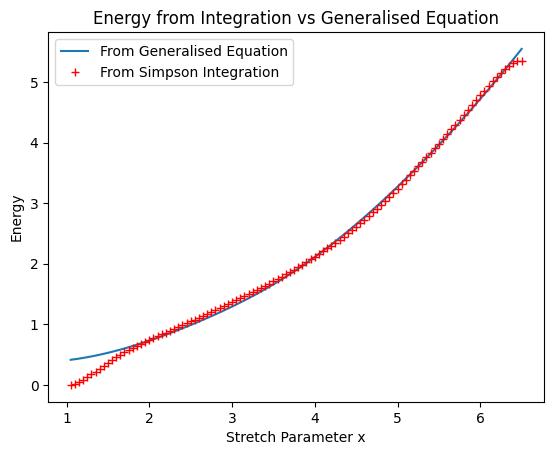

In [20]:
plt.plot(lamda_x,y_res)
plt.plot(lamda_x,energy,'r+')
plt.legend(["From Generalised Equation","From Simpson Integration"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy from Integration vs Generalised Equation")


In [21]:
popt_ab, pcov = curve_fit(min_arrudaboyce,X,Y,bounds=(0,np.inf))

In [22]:
popt_ab

array([4.26254048e-01, 3.46820937e-01, 3.03890913e-12, 3.28823555e-13,
       5.54314507e-14, 1.33752417e-03, 6.77558399e+04])

In [23]:
y_res_ab = min_arrudaboyce(X,*popt_ab)

Text(0.5, 1.0, 'Energy from Integration vs Arruda-Boyce Equation')

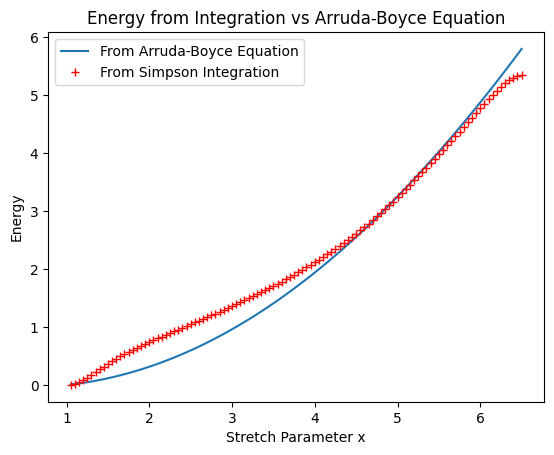

In [24]:
plt.plot(lamda_x,y_res_ab)
plt.plot(lamda_x,energy,'r+')
plt.legend(["From Arruda-Boyce Equation","From Simpson Integration"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy from Integration vs Arruda-Boyce Equation")

In [25]:
popt_carroll, pcov = curve_fit(min_carroll,X,Y,bounds=(0,np.inf))

In [26]:
popt_carroll

array([1.31148768e-01, 1.35603877e-16, 6.47285152e-03])

In [27]:
y_res_carroll = min_carroll(X,*popt_carroll)

Text(0.5, 1.0, 'Energy from Integration vs Carroll Equation')

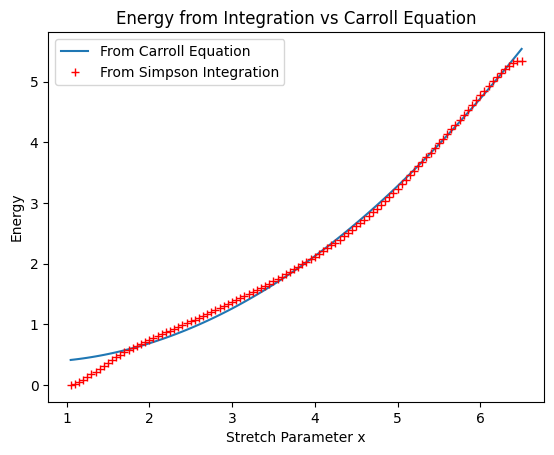

In [28]:
plt.plot(lamda_x,y_res_carroll)
plt.plot(lamda_x,energy,'r+')
plt.legend(["From Carroll Equation","From Simpson Integration"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy from Integration vs Carroll Equation")

In [29]:
popt_gt, pcov = curve_fit(min_gentthomas,X,Y,bounds=(0,np.inf))

In [30]:
popt_gt

array([0.17021356, 0.14026391])

In [31]:
y_res_gt = min_gentthomas(X,*popt_gt)

Text(0.5, 1.0, 'Energy from Integration vs Gent-Thomas Equation')

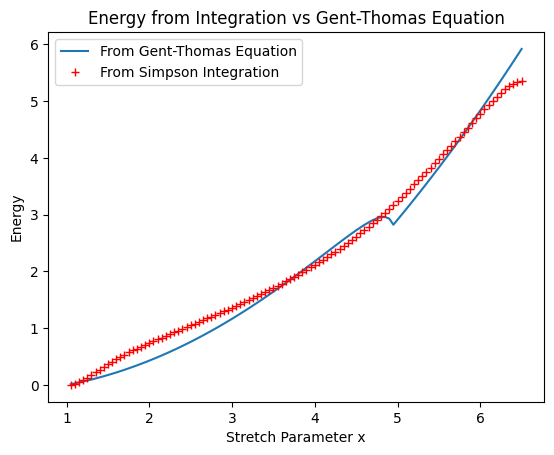

In [32]:
plt.plot(lamda_x,y_res_gt)
plt.plot(lamda_x,energy,'r+')
plt.legend(["From Gent-Thomas Equation","From Simpson Integration"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy from Integration vs Gent-Thomas Equation")

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

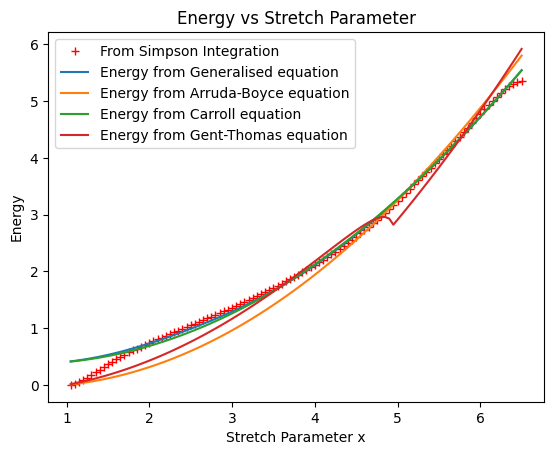

In [34]:
plt.plot(lamda_x,energy,'r+')
plt.plot(lamda_x,y_res)
plt.plot(lamda_x,y_res_ab)
plt.plot(lamda_x,y_res_carroll)
plt.plot(lamda_x,y_res_gt)
plt.legend(["From Simpson Integration","Energy from Generalised equation","Energy from Arruda-Boyce equation","Energy from Carroll equation","Energy from Gent-Thomas equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")